<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Model Evaluation and Refinement

Estaimted time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

-   Evaluate and refine prediction models


<h1>Table of content</h1>
<ul>
    <li><a href="#ref1">Model Evaluation </a></li>
    <li><a href="#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
    <li><a href="#ref3">Ridge Regression </a></li>
    <li><a href="#ref4">Grid Search</a></li>
</ul>


This dataset was hosted on IBM Cloud object click <a href="https://cocl.us/DA101EN_object_storage">HERE</a> for free storage.


In [6]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

 First lets only use numeric data 


In [7]:
df_num=df._get_numeric_data()
df_num.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


 Libraries for plotting 


In [ ]:
%%capture
! pip install ipywidgets

In [ ]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

<h2>Functions for plotting</h2>


In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h1 id="ref1">Part 1: Training and Testing</h1>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y</b>:</p>


In [9]:
y_data = df_num['price']

drop price data in x data


In [10]:
x_data=df_num.drop('price',axis=1)

Now we randomly split our data into training and testing data  using the function <b>train_test_split</b>. 


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1, test_size=0.10)

In [22]:
x_test.shape    # <- rows, columns
print("number of test samples:", x_test.shape[0])
print("numer of training samples:", x_train.shape[0])

number of test samples: 21
numer of training samples: 180


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is set to 10% of the total dataset. 


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1):</h1>

<b>Use the function "train_test_split" to split up the data set such that 40% of the data samples will be utilized for testing, set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train_1" , "x_test_1", "y_train_1" and  "y_test_1".</b>

</div>


In [23]:
# Write your code below and press Shift+Enter to execute 
df_num=df._get_numeric_data()
y_data = df_num['price']
x_data = df_num.drop('price', axis=1)

from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

print("test sample size:", x_test1.shape[0])
print("train sample size:", x_train1.shape[0])

test sample size: 81
train sample size: 120


Double-click <b>here</b> for the solution.

<!-- The answer is below:

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

-->


Let's import <b>LinearRegression</b> from the module <b>linear_model</b>.


In [24]:
from sklearn.linear_model import LinearRegression

 We create a Linear Regression object:


In [25]:
lm1 = LinearRegression()

we fit the model using the feature horsepower 


In [30]:
lm1.fit(x_train[['horsepower']], y_train)

LinearRegression()

Let's Calculate the R^2 on the TEST data:


In [33]:
Yhat1_test = lm1.predict(x_test[['horsepower']]).reshape(-1,1)       # <- remember to reshape Yhat data to column format ALWAYS
print("test data r^2:", lm1.score(Yhat1_test, y_test))

test data r^2: -191101.0172509392


we can see the R^2 is much smaller using the TRAIN data. (because we created the model using this data so there's is performance bias)


In [35]:
Yhat1_train = lm1.predict(x_train[['horsepower']]).reshape(-1,1)

print("train data r^2:", lm1.score(Yhat1_train, y_train))

train data r^2: -100049.40379548055


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2): </h1>
<b> 
Find the R^2  on the test data using 90% of the data for training data (regression on horsepower predictor)
</b>
</div>


In [40]:
# Write your code below and press Shift+Enter to execute 
df_num = df._get_numeric_data()
y_data = df_num['price']
x_data = df_num.drop('price', axis=1)

from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data, y_data, test_size=.1, random_state=0)

from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(x_train2[['horsepower']], y_train2)

Yhat_test2 = lm2.predict(x_test2[['horsepower']]).reshape(-1,1)
print("test data r^2:", lm2.score(Yhat_test2, y_test2))

test data r^2: -120044.90313581245


Double-click <b>here</b> for the solution.

<!-- The answer is below:

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

-->


 Sometimes you do not have sufficient training data; as a result, you may want to perform Cross-validation. Let's  go over several methods that you can use for  Cross-validation. 


<h2>Cross-validation Score</h2>


Lets import <b>cross_val_score</b> from the module <b>model_selection</b>.


In [46]:
from sklearn.model_selection import cross_val_score

We input the object, the feature in this case ' horsepower', the target data (y_data). The parameter 'cv'  determines the number of folds; in this case 4. 


In [55]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_data[['horsepower']], y_data)

from sklearn.model_selection import cross_val_score
r_scores = cross_val_score(lm, x_data[['horsepower']], y_data, cv=4)


The default scoring is R^2; each element in the array has the average  R^2 value in the fold:


In [56]:
r_scores

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

 We can calculate the average and standard deviation of our estimate:


In [59]:
print("estimated out-of-sample r^2:", r_scores.mean())


print("The mean of the folds are", r_scores.mean(), "and the standard deviation is" , r_scores.std())

# NOTE: this yields better r^2 than previous model which used 90% of data to train model (this shows that we didn't use sufficient training data for previous train_test_split)

estimated out-of-sample r^2: 0.522009915042119
The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


We can use mean squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'. 


In [68]:
-1 * cross_val_score(lm,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')       
# sklearn automatically sign flips so must mult by -1 to get actual mean_sqared_error scores

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3): </h1>
<b> 
Calculate the average R^2 using two folds, find the average R^2 for the second fold utilizing the horsepower as a feature : 
</b>
</div>


In [69]:
# Write your code below and press Shift+Enter to execute 
# "avg" r^2 therefore use cross_val_score

r2_scores = cross_val_score(lm, x_data[['horsepower']], y_data, cv=2)

print("avg r^2:", r2_scores.mean())


avg r^2: 0.5166761697127429


Double-click <b>here</b> for the solution.

<!-- The answer is below:

Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

-->


You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, using one fold for testing and the other folds are used for training.  First import the function:


In [70]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature in this case <b>'horsepower'</b> , the target data <b>y_data</b>. The parameter 'cv' determines the number of folds; in this case 4. We can produce an output:


In [74]:
Yhat_crossval = cross_val_predict(lm, x_data[['horsepower']], y_data, cv=4)
Yhat_crossval[:10]


array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598, 13986.46002486, 13986.46002486, 13986.46002486,
       18641.80153159, 12589.85757284])

<h1 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h1>

<p>It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world.  One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>


Let's create Multiple linear regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.


In [187]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)

from sklearn.linear_model import LinearRegression
mlr1 = LinearRegression()
mlr1.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)


LinearRegression()

Prediction using training data:


In [188]:
Yhat_train = mlr1.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]).reshape(-1,1)
Yhat_train[:5]

array([[ 7426.6731551 ],
       [28323.75090803],
       [14213.38819709],
       [ 4052.34146983],
       [34500.19124244]])

Prediction using test data: 


In [189]:
Yhat_test = mlr1.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]).reshape(-1,1)
Yhat_test[:5]

array([[11349.35089149],
       [ 5884.11059106],
       [11208.6928275 ],
       [ 6641.07786278],
       [15565.79920282]])

Let's perform some model evaluation using our training and testing data separately. First  we import the seaborn and matplotlibb library for plotting.


In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's examine the distribution of the predicted values of the training data.


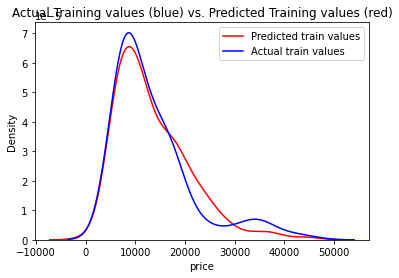

In [190]:
plot1 = sns.distplot(Yhat_train, color="r", label="Predicted train values", hist=False)
sns.distplot(y_train, color="b", label="Actual train values", hist=False, ax=plot1)
plt.title("Actual Training values (blue) vs. Predicted Training values (red)")
plt.legend()

# predictions on training data quite accurate

In [87]:
#Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
#DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

NameError: name 'DistributionPlot' is not defined

Figure 1: Plot of predicted values using the training data compared to the training data. 


So far the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values. 


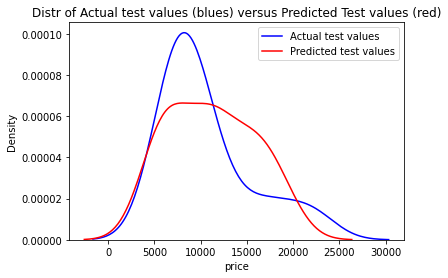

In [191]:
plot2 = sns.distplot(y_test, hist=False, color="b", label="Actual test values")
sns.distplot(Yhat_test, hist=False, ax=plot2, color="r", label="Predicted test values")
plt.title("Distr of Actual test values (blues) versus Predicted Test values (red)")
plt.legend()

# predictions on new data not very accurate

In [ ]:
#Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
#DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figur 2: Plot of predicted value using the test data compared to the test data. 


<p>Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different. <strong>Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</strong></p>


In [95]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>


Let's use 55 percent of the data for training and the rest for testing:


In [208]:
print(100-55)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.45, random_state=0)


45


We will perform a degree 5 polynomial transformation on the feature <b>'horse power'</b>. 


## Method 1 (scikit learn)

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

p = PolynomialFeatures(degree=5, include_bias=False)        # <- create empty degree 5 feature
x_train_pr = p.fit_transform(x_train[['horsepower']])       # <- fill empty feature with transformed horsepower data 

polyr = LinearRegression()
polyr.fit(x_train_pr, y_train)

NameError: name &#39;x_train&#39; is not defined

In [238]:
# function to plot method 1
def polyplot(x_train, y_train, x_test, y_test, lr_train, poly_feature, xlabel=None, ylabel=None, title=None):
    import matplotlib.pyplot as plt
    %matplotlib inline

    # plot training data point and testing data point
    plt.plot(x_train, y_train, 'g.', label="Training data")        # <- can use 'go' for larger green points
    plt.plot(x_test, y_test, 'r.', label="Testing data")          


    # plot regression line created using TRAINING data
    import numpy as np
    x_train_new = np.arange(x_train.values.min(), x_train.values.max(), 0.1)        
    # for continuous line create range of input numbers for regression from x_train min to x_train max
        # NOTE: np.arange creates 'a range' of numbers; differs from linspace b/c last parameter is step NOT total number of sample
        # NOTE: .min()/.max() are numebr methods (not list/array methods) therefore must be called relative to .values attribute (numbers)

    plt.plot(x_train_new, lr_train.predict(poly_feature.fit_transform(x_train_new.reshape(-1,1))), 'g-', label="Regression line fit using Training Data")
    # plot regression line, plt.plot(x, yhat)
    # Yhat = lr_train.predict(p.fit_transform(...))    <- remember to reshape yhat data to column just in case
        # p.fit_transform: p is empty polynom feature; fit_transform(x) fills empty feature with transformed x data (x^(degree)) 

    plt.legend()        # <- display labels in legend
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

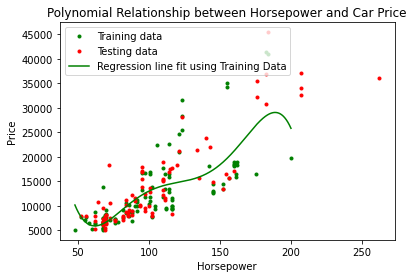

In [239]:
# plot method 1 result
polyplot(x_train=x_train[['horsepower']], x_test=x_test[['horsepower']], y_train=y_train, y_test=y_test, lr_train=polyr, poly_feature=p, xlabel='Horsepower', ylabel='Price', title='Polynomial Relationship between Horsepower and Car Price')

## Method 2 (numpy)

In [240]:
import numpy as np
f = np.polyfit(x_train['horsepower'], y_train, 5)   
p = np.poly1d(f)                                    
p

poly1d([-1.31190784e-05,  8.07405878e-03, -1.90423726e+00,  2.14487445e+02,
       -1.13639548e+04,  2.32561524e+05])

In [247]:
# function to plot numpy 1d polynom
def polyplot1d(x_train, x_test, y_train, y_test, poly1d, title=None, xlabel=None, ylabel=None):
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.plot(x_train, y_train, 'g.', label="Training data")  # <- plot x_train data in green
    plt.plot(x_test, y_test, 'r.', label="Testing data")    # <- plot x_test data in red

    import numpy as np
    x_train_new = np.arange(x_train.values.min(), x_train.values.max(), 0.1)     # <- create continuous input data to plug into polynom
    plt.plot(x_train_new, poly1d(x_train_new.reshape(-1,1)), 'g-', label="Regression line fit using Training Data")    # <- plot reg line using x_train data

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

    plt.show()

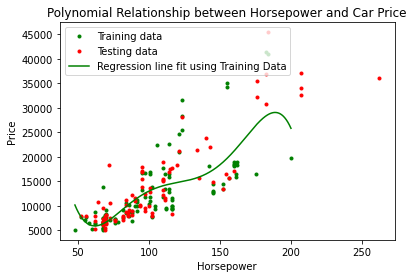

In [248]:
polyplot1d(x_train=x_train[['horsepower']], x_test=x_test[['horsepower']], y_train=y_train, y_test=y_test, poly1d=p, title='Polynomial Relationship between Horsepower and Car Price', xlabel='Horsepower', ylabel='Price')

In [196]:
def polyplot(x_train, y_train, x_test, y_test, pr, lr_train, title=None, ylabel=None, xlabel=None):
    import numpy as np

    import matplotlib.pyplot as plt
    plt.plot(x_train, y_train, 'g.', label="Training Data")
    plt.plot(x_test, y_test, 'r.', label="Testing Data")

    x_train_new = np.arange(x_train.values.min(), x_train.values.max(), 0.1)
    plt.plot(x_train_new, lr_train.predict(pr.fit_transform(x_train_new.reshape(-1, 1))), 'g-')

    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()

In [27]:
# Example of what .fit_transform() does
p = PolynomialFeatures(degree=2, include_bias=False)
x_new = p.fit_transform(x.reshape(-1,1))

x_new[:10]

array([[  50.  , 2500.  ],
       [  50.1 , 2510.01],
       [  50.2 , 2520.04],
       [  50.3 , 2530.09],
       [  50.4 , 2540.16],
       [  50.5 , 2550.25],
       [  50.6 , 2560.36],
       [  50.7 , 2570.49],
       [  50.8 , 2580.64],
       [  50.9 , 2590.81]])

Now let's create a linear regression model "poly" and train it.


In [108]:
poly = LinearRegression()
poly.fit(pr_train, y_train)

LinearRegression()

In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

We can see the output of our model using the method  "predict." then assign the values to "yhat".


In [109]:
yhat = poly.predict(pr_train)
yhat[0:5]

array([13157.924151  , 21890.74156968,  6409.57768534, 21231.67557352,
        7905.32481316])

Let's take the first five predicted values and compare it to the actual targets. 


In [ ]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


In [ ]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figur 4 A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 


## R^2 of the training data:


In [9]:
from sklearn.model_selection import train_test_split
y_data = df_num['price']
x_data = df_num.drop('price', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
p = PolynomialFeatures(degree=5, include_bias=False)
x_train_pr = p.fit_transform(x_train[['horsepower']], y_train)

polyr = LinearRegression()
polyr.fit(x_train_pr, y_train)

LinearRegression()

In [10]:
polyr.score(x_train_pr, y_train)

0.5567716902649369

## R^2 of the test data:


In [12]:
x_test_pr = p.fit_transform(x_test[['horsepower']], y_test)
polyr.score(x_test_pr, y_test)

-29.871453768585916

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model, <strong>a Negative R^2 is a sign of overfitting</strong>.


Let's see how the R^2 changes on the test data for different order polynomials and plot the results:


## Test multiple polynom degrees

### with cross validation and for loop? NOPE

In [32]:

import numpy as np
degrees = np.arange(1, 11, 1).tolist()      # <- does not include number 11

#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.45, )

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

r_squ = []
for deg in degrees:
    # create polynom
    poly_feat = PolynomialFeatures(include_bias=True, degree=deg)
    x_polydata = poly_feat.fit_transform(x_data[['horsepower']], y_data)
    polyr = LinearRegression()
    polyr.fit(x_polydata, y_data)

    scores = cross_val_score(polyr, x_data[['horsepower']], y_data, cv=10)
    avg = np.mean(scores)
    r_squ.append(avg)

print(r_squ)
#print(score)
# scores are r^2 so looking for highest number (= best model)

# looks like highest score: 0.87781458 (for deg=3)








[-0.1332505547064708, -0.1332505547064708, -0.1332505547064708, -0.1332505547064708, -0.1332505547064708, -0.1332505547064708, -0.1332505547064708, -0.1332505547064708, -0.1332505547064708, -0.1332505547064708]


### Instead...

In [77]:
degrees = np.arange(1, 11, 1).tolist()  # <- does not include number 11
r_squ = []

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=0, test_size=.45)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

for deg in degrees:
    poly_feat = PolynomialFeatures(include_bias = True, degree=deg)
    xtrain_polydata = poly_feat.fit_transform(x_train[['horsepower']], y_train)

    polyr = LinearRegression()
    polyr.fit(xtrain_polydata, y_train)

    xtest_polydata = poly_feat.fit_transform(x_test[['horsepower']])
    score=polyr.score(xtest_polydata, y_test)
    r_squ.append(score)      # <- check success predicting TEST DATA by comparing with actual


print(r_squ)

# scores are r^2 so looking for highest number (= best model)
# looks like highest score: 0.7406204232729607 (for deg=3)



[0.7325101750243117, 0.7405858710699899, 0.7406204232729607, 0.40639663604384924, -29.87134030204415, -1167.1982662062364, -3849.2189662197434, -12205.597880524398, -36597.824229744125, -99079.06969283079]


&lt;matplotlib.legend.Legend at 0x7f9fe74aeeb0&gt;

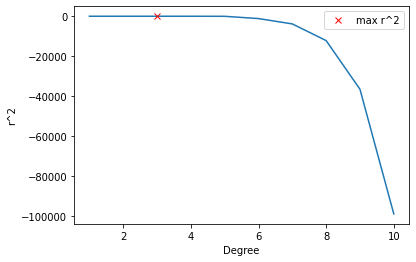

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

# we want to plot degree on x axis; r^2 on yaxis
plt.plot(degrees, r_squ, '-')
plt.xlabel('Degree')
plt.ylabel('r^2')
plt.plot(3,0.7406204232729607, 'rx', label="max r^2")
plt.legend()






In [26]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

NameError: name &#39;lr&#39; is not defined

We see the R^2 gradually increases until an order three polynomial is used. Then the  R^2 dramatically decreases at four.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4a):</h1>

<b>We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two?</b>

</div>


In [102]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat1 = PolynomialFeatures(degree=2, include_bias=False)

Double-click <b>here</b> for the solution.

<!-- The answer is below:

pr1=PolynomialFeatures(degree=2)

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4b): </h1>

<b> 
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform" 
?</b>
</div>


In [103]:
xtrain_polydata1 = poly_feat1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

Double-click <b>here</b> for the solution.

<!-- The answer is below:

x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->


<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4c): </h1>
<b> 
How many dimensions does the new feature have? Hint: use the attribute "shape"
</b>
</div>


In [104]:
xtrain_polydata1.shape       # <- 110rows, 14 columns (aka 14 features)

(110, 14)

Double-click <b>here</b> for the solution.

<!-- The answer is below:

 x_train_pr1.shape #There are now 15 features:

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4d): </h1>

<b> 
Create a linear regression model "poly1" and train the object using the method "fit" using the polynomial features?</b>
</div>


In [110]:
from sklearn.linear_model import LinearRegression
polyr1 = LinearRegression()

polyr1.fit(xtrain_polydata1, y_train)

LinearRegression()

Double-click <b>here</b> for the solution.

<!-- The answer is below:

poly1=LinearRegression().fit(x_train_pr1,y_train)

-->


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4e): </h1>
<b>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot"  to display the distribution of the predicted output vs the test data?</b>
</div>


In [116]:
# predict values for x test data
xtest_polydata1 = poly_feat1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]) # <- 1. Transform x_test data
xtest_polydata1.shape   # <- 91 rows, 14 columns (aka features)

Yhat_test1 = polyr1.predict(xtest_polydata1)    # <- input in polyr1
Yhat_test1[:5]

array([ 6303.02917842, 10402.87148101, 20516.37185593, 19273.87340833,
       20555.5169456 ])

&lt;matplotlib.legend.Legend at 0x7f9fe6e0daf0&gt;

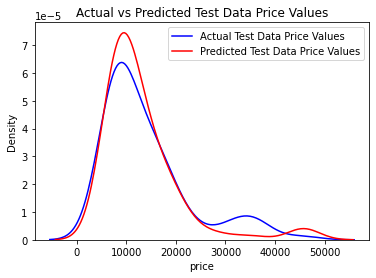

In [118]:
# plot distribution of actual y_test values versus Yhat_test1 values; degree 2 and multi-dimensional polynomr
import seaborn as sns
plot1 = sns.distplot(y_test, hist=False, color="b", label="Actual Test Data Price Values")
sns.distplot(Yhat_test1, ax=plot1, color="r", hist=False, label="Predicted Test Data Price Values")

plt.title("Actual vs Predicted Test Data Price Values")
plt.legend()

Double-click <b>here</b> for the solution.

<!-- The answer is below:

yhat_test1=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4f): </h1>

<b>Using the distribution plot above, explain in words about the two regions were the predicted prices are less accurate than the actual prices</b>

</div>


Predicted values are less accurate than actual prices:  
- ~10,000 price range (more predictions than actual); aka more predictions at $10,000 than actual
- ~30,000+ price range

Double-click <b>here</b> for the solution.

<!-- The answer is below:

$ 10,000 range and $30, 000 to $40,000 range the model is not as accurate.
    
-->


<h2 id="ref3">Part 3: Ridge regression</h2> 


 In this section, we will review Ridge Regression we will see how the parameter alpha changes the model. Just a note here our test data will be used as validation data.


 Let's perform a degree two polynomial transformation on our data. 


In [124]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(include_bias=True, degree=2)
xtrain_transformed = poly_feat.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

xtest_transformed = poly_feat.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])






In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

 Let's import  <b>Ridge</b>  from the module <b>linear model</b>.


In [121]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter to 0.1 


In [125]:
RidgeReg = Ridge(alpha=0.1)

Like regular regression, you can fit the model using the method <b>fit</b>.


In [126]:
RidgeReg.fit(xtrain_transformed, y_train)

Ridge(alpha=0.1)

 Similarly, you can obtain a prediction: 


In [127]:
Yhat = RidgeReg.predict(xtest_transformed)
Yhat[:5]

array([ 6567.83081933,  9597.97151399, 20836.22326843, 19347.69543463,
       21402.65500379])

Let's compare the first five predicted samples to our test set 


In [131]:
print('predicted:', Yhat[0:5])
print('test set :', y_test[0:5].values)     #<- notice first two values are similar but not others; experiment w/ other alpha values

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463
 21402.65500379]
test set : [ 6295. 10698. 13860. 13499. 15750.]


In [133]:
from sklearn.metrics import r2_score
score = r2_score(Yhat, y_test)
print(score)

0.48328335400689015


We select the value of Alpha that minimizes the test error, for example, we can use a for loop. 


In [163]:
# using for loop to select alpha
r2_vals = []

import numpy as np
alpha = [.0001, .001, .01, 1, 10, 1000, 10000]

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

for num in alpha:
    poly_feat = PolynomialFeatures(degree=2, include_bias=True)
    xtrain_transformed = poly_feat.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

    RidgeReg = Ridge(alpha=num)
    RidgeReg.fit(xtrain_transformed, y_train)

    xtest_transformed = poly_feat.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
    Yhat_test = RidgeReg.predict(xtest_transformed)

    score = r2_score(y_test, Yhat_test)     # <- ORDER MATTERS! should be y_true, y_pred
    r2_vals.append(score)

print(r2_vals[:8])

# best r^2: 0.5637872555145667 (alpha=10000)





[0.5222871591983822, 0.5223538386523485, 0.5229775723928914, 0.53342746694627, 0.5418576440206702, 0.5397312957688778, 0.5637872555145667]


In [137]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)-&gt;(n?,m?) (size 2 is different from 28)

In [142]:
Alpha = 10 * np.array(range(0,1000))
Alpha[:5]

array([ 0, 10, 20, 30, 40])

We can plot out the value of R^2 for different Alphas 


&lt;matplotlib.legend.Legend at 0x7f9fe9d3ee20&gt;

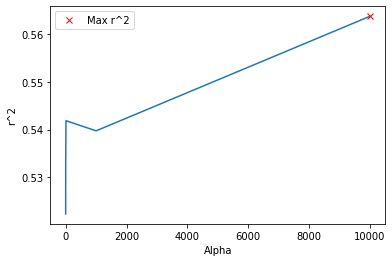

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline

# want to plot alpha on x, r^2 on Y; and mark max value
plt.plot(alpha, r2_vals)
plt.xlabel('Alpha')
plt.ylabel('r^2')

plt.plot(10000, 0.5637872555145667, 'rx', label="Max r^2")
plt.legend()





In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 6**:The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha. 


Here the model is built and tested on the same data. So the training and test data are the same.

The red line in figure 6 represents the R^2 of the test data.  
As Alpha increases the R^2 decreases.  
Therefore as Alpha increases the model performs worse on the test data.  

The blue line represents the R^2 on the validation data.  
As the value for Alpha increases the R^2 increases and converges at a point  


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>

Perform Ridge regression and calculate the R^2 using the polynomial features, use the training data to train the model and test data to test the model. The parameter alpha should be set to  10.

</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(include_bias=True, degree=)

In [174]:
degree = np.arange(1, 11, 1).tolist()

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

r_squ = []
for num in degree:
    poly_feat = PolynomialFeatures(degree=num, include_bias=True)
    xtrain_transformed = poly_feat.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

    RidgeReg=Ridge(alpha=10)
    RidgeReg.fit(xtrain_transformed, y_train)

    xtest_transformed = poly_feat.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
    Yhat = RidgeReg.predict(xtest_transformed)

    score = r2_score(y_test, Yhat)
    r_squ.append(score)

print(r_squ)        # <- degree 1 => best r2 score

[0.7761256550524174, 0.5418576440206702, -130.36101235132452, -26.21013691266771, -51.76351757906509, -116.2623058193634, -213.26156533370212, -318.623966034054, -589.2822902289685, -405.4240608172561]


In [177]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

poly_feat = PolynomialFeatures(degree=1, include_bias=True)
xtrain_transformed = poly_feat.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

RidgeReg=Ridge(alpha=10)
RidgeReg.fit(xtrain_transformed, y_train)

xtest_transformed = poly_feat.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
Yhat = RidgeReg.predict(xtest_transformed)
print("R-squared:", r2_score(y_test, Yhat))

R-squared: 0.7761256550524174


Double-click <b>here</b> for the solution.

<!-- The answer is below:

RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

r^2: 0.7761256550524174
-->


<h2 id="ref4">Part 4: Grid Search</h2>


The term alpha is a hyperparameter, sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.
(in place of using for loop)

Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.


In [179]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:


In [180]:
parameters1 = {'alpha': [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000], 'normalize': [True, False]}
parameters1

{&#39;alpha&#39;: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
 &#39;normalize&#39;: [True, False]}

Create a ridge regression object:


In [182]:
from sklearn.linear_model import Ridge
RidgeReg1 = Ridge()

RidgeReg1

Ridge()

Create a ridge grid search object 


In [185]:
?GridSearchCV

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    iid=&#39;deprecated&#39;,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch=&#39;2*n_jobs&#39;,
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a &quot;fit&quot; and a &quot;score&quot; method.
It also implements &quot;predict&quot;, &quot;predict_proba&quot;, &quot;decision_function&quot;,
&quot;transform&quot; and &quot;inverse_transform&quot; if they are implemented in the
estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide &lt;grid_search&gt;`.

Parameters
----------
estimator : estimator object.
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs

In [187]:
Grid1 = GridSearchCV(RidgeReg, parameters1, cv=10)
Grid1

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={&#39;alpha&#39;: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000],
                         &#39;normalize&#39;: [True, False]})

Fit the model 


In [194]:
Grid1.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)







GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={&#39;alpha&#39;: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000],
                         &#39;normalize&#39;: [True, False]})

In [ ]:
#Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [195]:
best_params = Grid1.best_estimator_
best_params

Ridge(alpha=1, normalize=True)

 We now test our model on the test data 


In [201]:
Yhat = best_params.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
Yhat[:5]


#scores=Grid1.cv_results_
#scores['mean_test_score']

array([ 6549.71875337, 10695.12726474, 17236.49965579, 19414.79101588,
       18580.69179511])

In [ ]:
best_params.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)  # <- for r^2

In [208]:
results=Grid1.cv_results_        # <- stored test results 
results
results['mean_test_score']

array([ 0.59570627,  0.59564063,  0.59629217,  0.59564064,  0.60170772,
        0.59564071,  0.63167665,  0.59564148,  0.65041238,  0.59564915,
        0.27555389,  0.59572535, -0.06688621,  0.59644118, -0.12092142,
        0.60111457, -0.12661796,  0.61492521])

In [209]:
pd.DataFrame(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026842,0.016153,0.024556,0.015086,0.0001,True,"{'alpha': 0.0001, 'normalize': True}",0.572456,0.916726,0.677277,0.742227,0.856101,-0.030745,0.228102,0.249524,0.889476,0.855920,0.595706,0.316378,9
1,0.031743,0.017278,0.020320,0.008306,0.0001,False,"{'alpha': 0.0001, 'normalize': False}",0.572391,0.916732,0.677272,0.742243,0.856123,-0.031233,0.227925,0.249530,0.889484,0.855940,0.595641,0.316500,14
2,0.017647,0.002933,0.012701,0.004476,0.001,True,"{'alpha': 0.001, 'normalize': True}",0.573046,0.916668,0.677323,0.742083,0.855899,-0.026385,0.229677,0.249471,0.889401,0.855739,0.596292,0.315284,7
3,0.017514,0.004282,0.011737,0.003773,0.001,False,"{'alpha': 0.001, 'normalize': False}",0.572391,0.916732,0.677272,0.742243,0.856123,-0.031233,0.227925,0.249530,0.889484,0.855940,0.595641,0.316500,13
4,0.016926,0.003404,0.012184,0.002561,0.01,True,"{'alpha': 0.01, 'normalize': True}",0.578675,0.915988,0.677671,0.740643,0.853868,0.014660,0.244009,0.249053,0.888560,0.853951,0.601708,0.305092,4
5,0.016255,0.002390,0.010885,0.003002,0.01,False,"{'alpha': 0.01, 'normalize': False}",0.572391,0.916732,0.677272,0.742243,0.856123,-0.031232,0.227925,0.249530,0.889484,0.855940,0.595641,0.316500,12
6,0.017026,0.003822,0.012351,0.002861,0.1,True,"{'alpha': 0.1, 'normalize': True}",0.618436,0.904760,0.674478,0.726823,0.834487,0.269036,0.320821,0.252782,0.877543,0.837601,0.631677,0.245219,2
7,0.015805,0.002477,0.011334,0.002019,0.1,False,"{'alpha': 0.1, 'normalize': False}",0.572391,0.916732,0.677272,0.742243,0.856123,-0.031227,0.227925,0.249531,0.889484,0.855940,0.595641,0.316499,11
8,0.017242,0.005180,0.012317,0.002959,1,True,"{'alpha': 1, 'normalize': True}",0.729625,0.789269,0.576246,0.635567,0.721238,0.631191,0.480655,0.421771,0.782853,0.735709,0.650412,0.119404,1
9,0.016429,0.002930,0.011941,0.001756,1,False,"{'alpha': 1, 'normalize': False}",0.572400,0.916732,0.677273,0.742247,0.856124,-0.031172,0.227921,0.249543,0.889483,0.855941,0.595649,0.316488,10


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #6): </h1>
Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

-->


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a>

<a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2020-09-14        | 2.1     | Lakshmi    | Made changes in OverFitting section |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab  |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


# Summary

In [ ]:
# In-sample evaluation (see model development lab) tests how well model fits data USED to train it; NOT how well it will predict new values

# ------------------------- split data into training and testing portions
form sklearn.model_selection import train_test_split()
x_train, x_test, y_train, y_test = train-test_split(df['x'], df['y'], test_size=0.3, random_state=0)    
# where 0.3 is proportion of data being used for test
# usually use larger amount to train data than use to test
# random_state is like set.seed in R

In [ ]:
# ------------------------- out-of-sample evaluation

# Generalization error = how well model is at predicting from unseen data (approx by error we get from predicting using test data)
# training with a lot of data and testing with a little => accurate but imprecise; therefore use cross-validation

# cross-validation divides data into equal sections and repeats the training/testing process so each section has opportunity to be part of training and testing of model; then calculates r^2 for each
# NOTE: good to use when don't have enough training data, when we want to compare diff ML models
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, x_data[['x']], y_data, cv=folds)        # <- where lm is model object, cv is number of sections the data is divided into

import numpy as np
np.mean(scores)     # <- averages cros_val_score() results to estimate out-of-sample r^2; or use scores.mean()
scores.std()        # => sd of out-of-sample r^2

# NOTE: default is r^2 score to get mean squ error set scoring to 'neg_mean_squared_error' and mult by -1
scores = -1 * cross_val_score(lm, x_data[['x']], y_data, cv=folds, scoring='neg_mean_squared_error') 

# To return the predictions used to calculate each r^2 during cross_val_score()
from sklearn.model_selection import cross_val_predict
Yhat = cross_val_predict(lm, x_data[['x]'], y_data, cv=folds)       # <- each fold returns a fraction of the total predicitons (y_1, y_2...y_3, y_4...y_5, y_6) 

In [ ]:
# ------------------------- How to Pick best polynom order
# underfitting = model is too simple to fit data
# overfitting = model is too complex for data; fits training point but not true function

Rsqu_test = []
degree = [1, 2, 3, 4]      # <- or np.arange(1, 5, 1).tolist(); doesn't include 5

from sklearn.model_selection import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(x_data[['x_1, x_2, x_3']], y_data, test_size=0.3, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

for n in degree:
    poly_feat = PolynomialFeatures(degree=n)
    xtrain_transformed = poly_feat.fit_transform(x_train[['x_1']])       # <- transform train data into polynom

    polyr = LinearRegression()
    polyr.fit(xtrain_transformed, y_train)

    xtest_transformed = poly_feat.fit_transform(x_test['x_1'])           # <- transform test data into polynom
    score = polyr.score(xtest_transformed, y_test)
    Rsqu_test.append(score)                                              # <- check success predicting TEST DATA by comparing with actual

print(Rsqu_test)


# ----------------- Plot r^2 versus r^degree
import matplotlib.pyplot as plt
%matplotlib inline

# plot degree on x, r^2 on y
plt.plot(degree, Rsqu_test, '-')

# mark max r^2
plt.plot(n1, n2, 'rx', label="Maximum r^2")          # <- where n1 is degrees corresponding to maximum r^2 (n_2)

plt.xlabel("Degree")
plt.ylabel("r^2")
plt.legend()


In [ ]:
# ------------------------- Ridge Regression (controls magnitude of coefficients of polynoms w/ alpha)
# When any model is trained using very little training data can => regression with high variance (overfit/fits training data but not new data) ridge regression used to add a little bias to the regression so that variance is reduced

# NOTE: high magnitude of coeff => overfitting
# as alpha parameter *incr*, coeff magnitude *decr*
# NOTE: too large alpha => coeff approach 0 and underfitting

# NOTE: we select alpha b/f training/fitting

from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=num)
RidgeModel.fit(x_train['x'], y_train)
Yhat = RidgeModel.predict(x_test['x']).reshape(-1,1)
Yhat[:5]

In [ ]:
# ------ use for loop to find best alpha value
r_squ = []

alpha = [.001, .01, .1, 1, 10, 1000, 10000]

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
form sklearn.metrics import r2_score
for num in alpha:
    RidgeReg = Ridge(num)

    poly_feat = PolynomialFeatures(include_bias = True, degree=deg)
    xtrain_transformed = poly_feat.fit_transform(x_train[['x_1', ...]], y_train)

    RidgeReg.fit(xtrain_transformed, y_train)

    xtest_transformed = poly_feat.fit_transform(x_test[['x_1', ...]])
    score = r2_score(y_true=y_test, y_pred=RidgeReg.predict(xtest_transformed))
    r_squ.append(score)

print(r_squ)

# ---- plot r^2 vs. alpha
import matplotlib.pyplot as plt
%matplotlib inline

# alpha on x, r^2 on y
plt.plot(alpha, r_squ, '-')

# mark max r^2 value
plt.plot(n_1, n_2, 'rx', label="MAximum r^2 value")            # <- where n_1 is alpha val corresponding to mac r^2 value (n_2)

plt.xlabel("Alpha")
plt.ylabel("r^2")
plt.legend()

In [ ]:
# ------------------------- Grid Search (quickly determines best parameter values to use for model)

# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
                        # or
parameters = {'alpha': [.001, .01, .1, 1, 10, 100, 1000, 10000, 100000], 'normalize': [True, False]}

RidgeModel = Ridge()

Grid1 = GridSearchCV(parameters, RidgeModel, cv=num)        # <- cv is numbe of folds
Grid1.fit(x_train[['x_1, x_2, x_3,...']], y_train)

best_params = Grid1.best_estimator     # <- to store the best parameter values
best_params

Yhat = best_params.predict(x_test[['x_1',...]])   # <- to make predictions using best parameter values
best_params.score(x_test[['x_1',...]], y_test)    # <- for r^2

results=Grid1.cv_results_        # <- more info on best parameter value test results

import pandas as pd
pd.DataFrame(results)            # <- converts results to dataframe

In [ ]:
# ------------------------- Extras
# to get only numeric data
df_num = df._get_numeric_data

df_num.head()

# useful to put potential predictor data and target data in separate frames
y_data = df['y']
x_data = df.drop('y', axis=1)

# to print summary of rows, columns
x.shape

# to add legend to plot with labels
plt.legend()

In [ ]:
# ------------------------- Plot test data, train data, and curve
import matplotlib.pyplot as plt
%matplotlib inline

polyr = LinearRegression()
polyr.fit(xtrain_transformed, y_train)

def polyplot(x_train, y_train, x_test, y_test, lr_train, poly_feature, xlabel=None, ylabel=None, title=None):
    import matplotlib.pyplot as plt
    %matplotlib inline

    # plot training data point and testing data point
    plt.plot(x_train, y_train, 'g.', label="Training data")        # <- can use 'go' for larger green points
    plt.plot(x_test, y_test, 'r.', label="Testing data")          


    # plot regression line created using TRAINING data
    x_train_new = np.arange(x_train.values.min(), x_train.values.max(), 0.1)        
    # for continuous line create range of input numbers for regression from x_train min to x_train max
        # NOTE: np.arange creates 'a range' of numbers; differs from linspace b/c last parameter is step NOT total number of sample
        # NOTE: .min()/.max() are numebr methods (not list/array methods) therefore must be called relative to .values attribute (numbers)

    plt.plot(x_train_new, polyr.predict(poly_feat.fit_transform(x_train_new.reshape(-1,1))), 'g-', label="Regression line fit using Training Data")
    # plot regression line, plt.plot(x, yhat)
    # Yhat = polyr.predict(polyfeat.fit_transform(...))    
        # poly_feat.fit_transform: poly_feat is empty polynom feature; fit_transform(x) fills empty feature with transformed x data (x^(degree)) 

    plt.legend()        # <- display labels in legend
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)